In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing libraries
import nltk
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Raw Text Analysis
random_text = """Hello mars. It is a dream #of #2050 #civilizations https://www.instagram.com/p/COs6emJhStvY8GadvQM64OlVh-rT3tFixBrRlg0/"""

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

remove_link_text = re.sub(r'https?:\/\/.*[\r\n]*', '', random_text)
remove_link_text = re.sub(r'#', '', remove_link_text)
print(remove_link_text)

Hello mars. It is a dream of 2050 civilizations 


In [ ]:
print('\033[92m' + random_text)
print('\033[92m' + remove_link_text)

Hello mars. It is a dream #of #2050 #civilizations https://www.instagram.com/p/COs6emJhStvY8GadvQM64OlVh-rT3tFixBrRlg0/
Hello mars. It is a dream of 2050 civilizations 


In [ ]:
from nltk.tokenize import sent_tokenize
text="""Hello Mr. steve, how you doing? whats up? The weather is great, and city is awesome. how you doing? The sky is pinkish-blue. You shouldn't eat cardboard, how you doing?"""
# download punkt
nltk.download("punkt")
tokenized_text=sent_tokenize(text)
print(tokenized_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['Hello Mr. steve, how you doing?', 'whats up?', 'The weather is great, and city is awesome.', 'how you doing?', 'The sky is pinkish-blue.', "You shouldn't eat cardboard, how you doing?"]


In [ ]:
# breaks paregraph into words
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'steve', ',', 'how', 'you', 'doing', '?', 'whats', 'up', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'how', 'you', 'doing', '?', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard', ',', 'how', 'you', 'doing', '?']


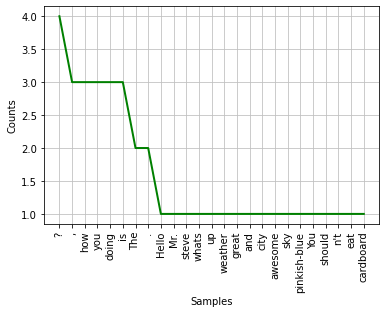

In [ ]:
# frequency distribution
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
fdist.most_common(4)
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30, cumulative = False, color = "green")
plt.show()

In [ ]:
# stop words
from nltk.corpus import stopwords
# download stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{"don't", 'after', 're', 'both', "shan't", 'won', 'just', "it's", 'than', "you'll", "needn't", 'before', 'mustn', 'themselves', "wasn't", 'wouldn', 'been', 'our', "isn't", "you'd", 'weren', 'while', 'then', 'isn', 'an', 'she', 'few', 'through', 'had', "won't", 'there', 'of', 'needn', 'doesn', 'now', "hasn't", 'no', 'my', 'some', 'any', 'ma', 'the', 'all', 'for', 'ain', 'myself', 'am', 'on', "you're", 'under', "weren't", 'in', 'very', 'have', 'as', 'up', 'himself', 'shouldn', 'ourselves', 'theirs', 'did', 'll', "didn't", 'own', 'were', 'such', 'between', 'at', 'whom', 'about', 'only', 'o', 'when', 'where', 'your', 'i', 'those', 'or', "haven't", 'from', 'them', 'during', 'was', 'which', "wouldn't", 'are', 'not', "shouldn't", 'a', "you've", 'he', 'but', 'you', 'haven', 's', 'being', 'itself', 'above', 'wasn', 'do', 'has', 'mightn', 'they', 'her', 't', 'to', 'their', 'more', 'm', 

In [ ]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['Hello', 'Mr.', 'steve', ',', 'how', 'you', 'doing', '?', 'whats', 'up', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'how', 'you', 'doing', '?', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard', ',', 'how', 'you', 'doing', '?']
Filterd Sentence: ['Hello', 'Mr.', 'steve', ',', '?', 'whats', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', '?', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard', ',', '?']


In [ ]:
# stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Hello', 'Mr.', 'steve', ',', '?', 'whats', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', '?', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard', ',', '?']
Stemmed Sentence: ['hello', 'mr.', 'steve', ',', '?', 'what', '?', 'the', 'weather', 'great', ',', 'citi', 'awesom', '.', '?', 'the', 'sky', 'pinkish-blu', '.', 'you', "n't", 'eat', 'cardboard', ',', '?']


In [ ]:
#Lexicon Normalization
#performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Lemmatized Word: fly
Stemmed Word: fli


In [1]:
# Tasks which are already performed by professor 
# Pandas Matplotlib

In [2]:
import nltk # Python library for NLP
from nltk.corpus import twitter_samples # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt # library for visualization
import random # pseudo-random number generator

In [3]:
#downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [4]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [5]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))
print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


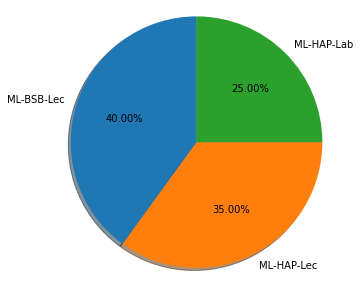

In [7]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))
# labels for the classes
labels = 'ML-BSB-Lec', 'ML-HAP-Lec','ML-HAP-Lab'

# Sizes for each slide
sizes = [40, 35, 25]
# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%.2f%%',
shadow=True, startangle=90)
#autopct enables you to display the percent value using Python string formatting.
#For example, if autopct='%.2f', then for each pie wedge, the format string is '%.2f' and

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
# Display the chart
plt.show()

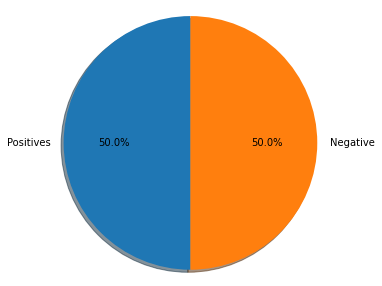

In [8]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))
# labels for the two classes
labels = 'Positives', 'Negative'
# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)]
# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
# Display the chart
plt.show()

Looking at raw text

In [10]:
# print positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])
# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

@zachbraff @torixoxx this is kind of true :p #ActuallyThough
@AdityaRajKaul really thought you were one good journo.. But the lure of the gang I see is very strong.. Sad to see you too twisting news :(


In [11]:
# Our selected sample
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [12]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
import re # library for regular expression operations
import string # for string operations
from nltk.corpus import stopwords # module for stop words that come with NLTK
from nltk.stem import PorterStemmer # module for stemming
from nltk.tokenize import TweetTokenizer # module for tokenizing strings

In [15]:
print('\033[92m' + tweet)
print('\033[94m')
# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [16]:
print()
print('\033[92m' + tweet2)
print('\033[94m')
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False)
# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)
print()
print('Tokenized string:')
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [17]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')
print('Stop words\n')
print(stopwords_english)
print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [21]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')
tweets_clean = []
for word in tweet_tokens: # Go through every word in your tokens list
  if (word not in stopwords_english and word not in string.punctuation): # remove punctuation
    tweets_clean.append(word)
print('removed stop words and punctuation:')
print(tweets_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [23]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')
# Instantiate stemming class
stemmer = PorterStemmer()
# Create an empty list to store the stems
tweets_stem = []
for word in tweets_clean:
  stem_word = stemmer.stem(word) # stemming word
  tweets_stem.append(stem_word) # append to the list
print('stemmed words:')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
